<a href="https://colab.research.google.com/github/oo363636/project/blob/master/assignment1_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx

1. Use the function nx.read edgelist() to load the dataset Wiki-Vote.txt.

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Wiki-Vote.txt'

In [ ]:
G = nx.read_edgelist(path=path, create_using=nx.DiGraph())
print(G.number_of_edges())
print(G.number_of_nodes())

103689
7115


2. Output the following information related to degree

2.1 average degree, average in-degree, average out-degree

In [ ]:
total_edges = G.number_of_edges()
total_nodes = G.number_of_nodes()
average_degree = 2 * total_edges / total_nodes
average_indegree = total_edges / total_nodes
average_outdegree = total_edges / total_nodes
print('average degree is : %s' %average_degree)
print('average in_degree is : %s' %average_indegree)
print('average out_degree is : %s' %average_outdegree)

average degree is : 29.146591707659873
average in_degree is : 14.573295853829936
average out_degree is : 14.573295853829936


2.2 degree distribution (plot both the degree and frequency in log scale)

In [ ]:
def distribution(Graph):
  degree = nx.degree_histogram(Graph)
  x = range(len(degree))
  y = [z / float(sum(degree)) for z in degree]
  plt.loglog(x, y, color='blue')
  plt.xlabel('log(degree)')
  plt.ylabel('log(frequency)')
  plt.show()

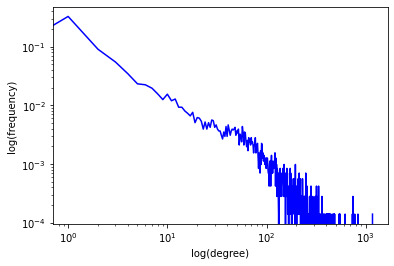

In [ ]:
distribution(G)

2.3 density (E/N2
), where E is the number of edges, and N is the number of nodes

In [ ]:
density = total_edges / np.square(total_nodes)
print('density is :',density)

density is : 0.002048249592948691


3. Find the largest strongly connected component (giant component), and output the number of nodes in it

In [ ]:
giant_component = max(nx.strongly_connected_components(G), key=len)
print('number of nodes in giant component is : ' ,len(giant_component))

number of nodes in giant component is :  1300


4. Output the following information about this giant component related to distance and clustering

In [ ]:
G_SCC = nx.subgraph(G, giant_component)
# print(G_SCC.number_of_nodes())
# print(G_SCC.number_of_edges())

4.1 distribution of path length

In [ ]:
# put all path length of each node in path_length
path_length = []
for i in G_SCC:
  each_path = nx.single_source_shortest_path_length(G_SCC, i)

  for j in each_path.values():
    path_length.append(j)

# create a dict , key is path length and value is corresponding number
path_length_dic = {}
for k in path_length:
  if k in path_length_dic:
    path_length_dic[k] += 1
  else:
    path_length_dic[k] = 1

print('path length : number')

path_length_list = []
number = []

for p, q in path_length_dic.items():
  path_length_list.append(p)
  number.append(q)
  print(' '*6, p, ' '*4 , q)


path length : number
       0      1300
       1      39456
       2      517287
       3      802724
       4      277167
       5      44366
       6      5396
       7      1411
       8      745
       9      148


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1300, 39456, 517287, 802724, 277167, 44366, 5396, 1411, 745, 148]


Text(0, 0.5, 'number')

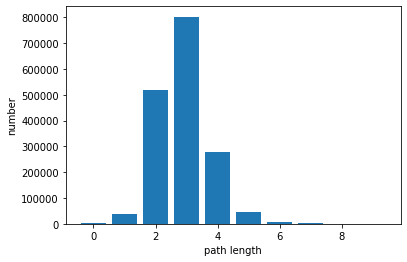

In [ ]:
print(path_length_list)
print(number)

plt.bar(path_length_list, number)
plt.xlabel('path length')
plt.ylabel('number')

4.2 average path length

In [ ]:
average_path_length = nx.average_shortest_path_length(G_SCC)
print('average path length is : ', average_path_length)

average path length is :  2.8792828803221413


4.3 distribution of clustering coefficient

Text(0, 0.5, 'frequency')

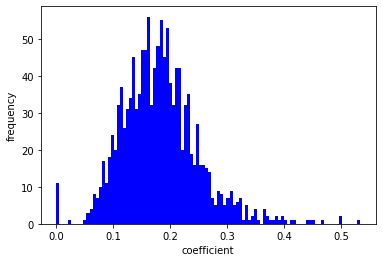

In [ ]:
coefficient = []
for i in giant_component:
  each_coefficient = nx.clustering(G_SCC, i)
  coefficient.append(each_coefficient)

plt.hist(coefficient, color='blue', bins=100)
plt.xlabel('coefficient')
plt.ylabel('frequency')

4.4 average clustering coefficient

In [ ]:
average_clustering_coefficient = nx.average_clustering(G_SCC)
print('average clustering coefficient is : ',average_clustering_coefficient)

average clustering coefficient is :  0.182218301132536


5. Treat the network as undirected. Output the following information related to degree

In [ ]:
G_undi = G.to_undirected()

5.1 average degree

In [ ]:
total_edges_undi = G_undi.number_of_edges()
total_nodes_undi = G_undi.number_of_nodes()
average_degree_undi = 2 * total_edges_undi / total_nodes_undi
print('average degree is : %s' %average_degree_undi)

average degree is : 28.32382290934645


5.2 degree distribution (plot both the degree and frequency in log scale)

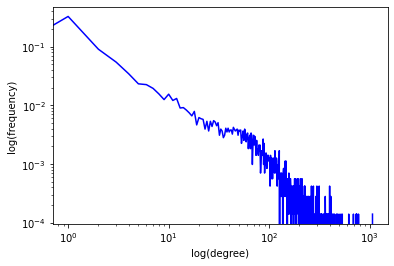

In [ ]:
# use the function we defined before
distribution(G_undi)

5.3 density (E/N2
)

In [ ]:
density_undi = total_edges_undi / np.square(total_nodes_undi)
print('density is :',density_undi)

density is : 0.001990430281753089
